In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import pathlib
import os

### File Read

Analyze Data

In [12]:
def display_random_image(dir, class_type):

    # Directory defination
    img_dir = dir + "\\" + class_type

    # Listing all images in directory
    files = os.listdir(img_dir)

    # Choosing random image from directory
    img_name = random.choice(files)

    # Read the Image
    img = mpimg.imread(img_dir + '\\' + img_name)

    # Plot image with title & shape
    plt.imshow(img)
    plt.title(class_type)
    plt.axis("off");

    print(f"Imgae Shape: {img.shape}" )

Imgae Shape: (512, 512, 3)


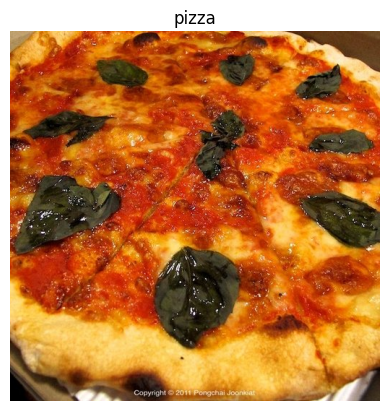

In [13]:

display_random_image("D:\python tutorial\CNN\hotdog_pizza\\", "pizza")

Imgae Shape: (384, 512, 3)


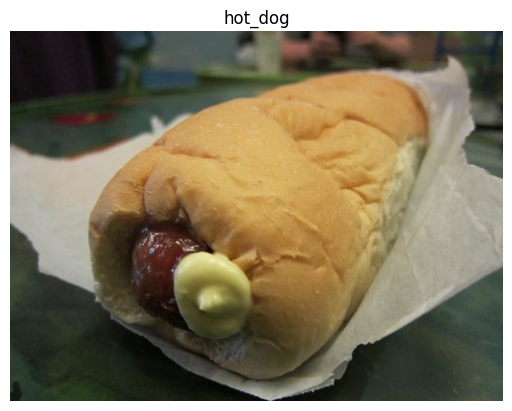

In [14]:
img = display_random_image("D:\python tutorial\CNN\hotdog_pizza\\", "hot_dog")

### Data Prepration

In [15]:
# Training and Testing data directory
data_dir = "D:\python tutorial\CNN\hotdog_pizza\\"


# Import data, turn it into batches of 32 with a size of 256x256
# Batch : We loop through batches of 32 images to minimize 
# memory requirements
# Works with PNG, JPG, BMP, PPM, TIF files

training_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            seed=66)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            batch_size=32,
                                                            image_size=(256, 256),
                                                            seed=66)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [16]:
# Get class names
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


### Normalizing Data

In [19]:
# Import data, turn it into batches of 32 with a size of 256x256
# Batch : We loop through batches of 32 images to minimize 
# memory requirements
# Works with PNG, JPG, BMP, PPM, TIF files

norm_layer = tf.keras.layers.Rescaling(1/255.)

# Apply the division to all data in traing data set
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))

# Do same for test (validation) dataset
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [20]:
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.47401965, 0.36029413, 0.30539218],
        [0.44852945, 0.33480394, 0.27990198],
        [0.45784315, 0.33235297, 0.28137258],
        ...,
        [0.02058824, 0.00294118, 0.01666667],
        [0.03921569, 0.01960784, 0.03529412],
        [0.05196079, 0.03235294, 0.04803922]],

       [[0.4534314 , 0.33088237, 0.27892157],
        [0.42058825, 0.29803923, 0.24607845],
        [0.34754905, 0.22205883, 0.17107844],
        ...,
        [0.02205882, 0.00441176, 0.01813726],
        [0.06421569, 0.04460784, 0.06029412],
        [0.03872549, 0.01911765, 0.03480392]],

       [[0.37352943, 0.24607845, 0.19607845],
        [0.34509805, 0.21764708, 0.16764706],
        [0.33676472, 0.20931374, 0.15931374],
        ...,
        [0.03186275, 0.0122549 , 0.02794118],
        [0.05539216, 0.03578432, 0.05147059],
        [0.02107843, 0.00392157, 0.01715686]],

       ...,

       [[0.26911765, 0.16715688, 0.10637256],
        [0.26

In [29]:
def model_graph(x):
    # Plot models training curves
    pd.DataFrame(x.history).plot(figsize=(20, 10))

### Non-CNN Model on Data

In [34]:
tf.random.set_seed(66)

model_1 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(training_data_norm,
                        epochs=5,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 6s 94ms/step - loss: 1.1478 - accuracy: 0.5063 - val_loss: 0.6935 - val_accuracy: 0.4650
Epoch 2/5
50/50 [==============================] - 5s 88ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6936 - val_accuracy: 0.4650
Epoch 3/5
50/50 [==============================] - 5s 84ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6936 - val_accuracy: 0.4650
Epoch 4/5
50/50 [==============================] - 5s 87ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6939 - val_accuracy: 0.4650
Epoch 5/5
50/50 [==============================] - 5s 85ms/step - loss: 0.6930 - accuracy: 0.5088 - val_loss: 0.6940 - val_accuracy: 0.4650


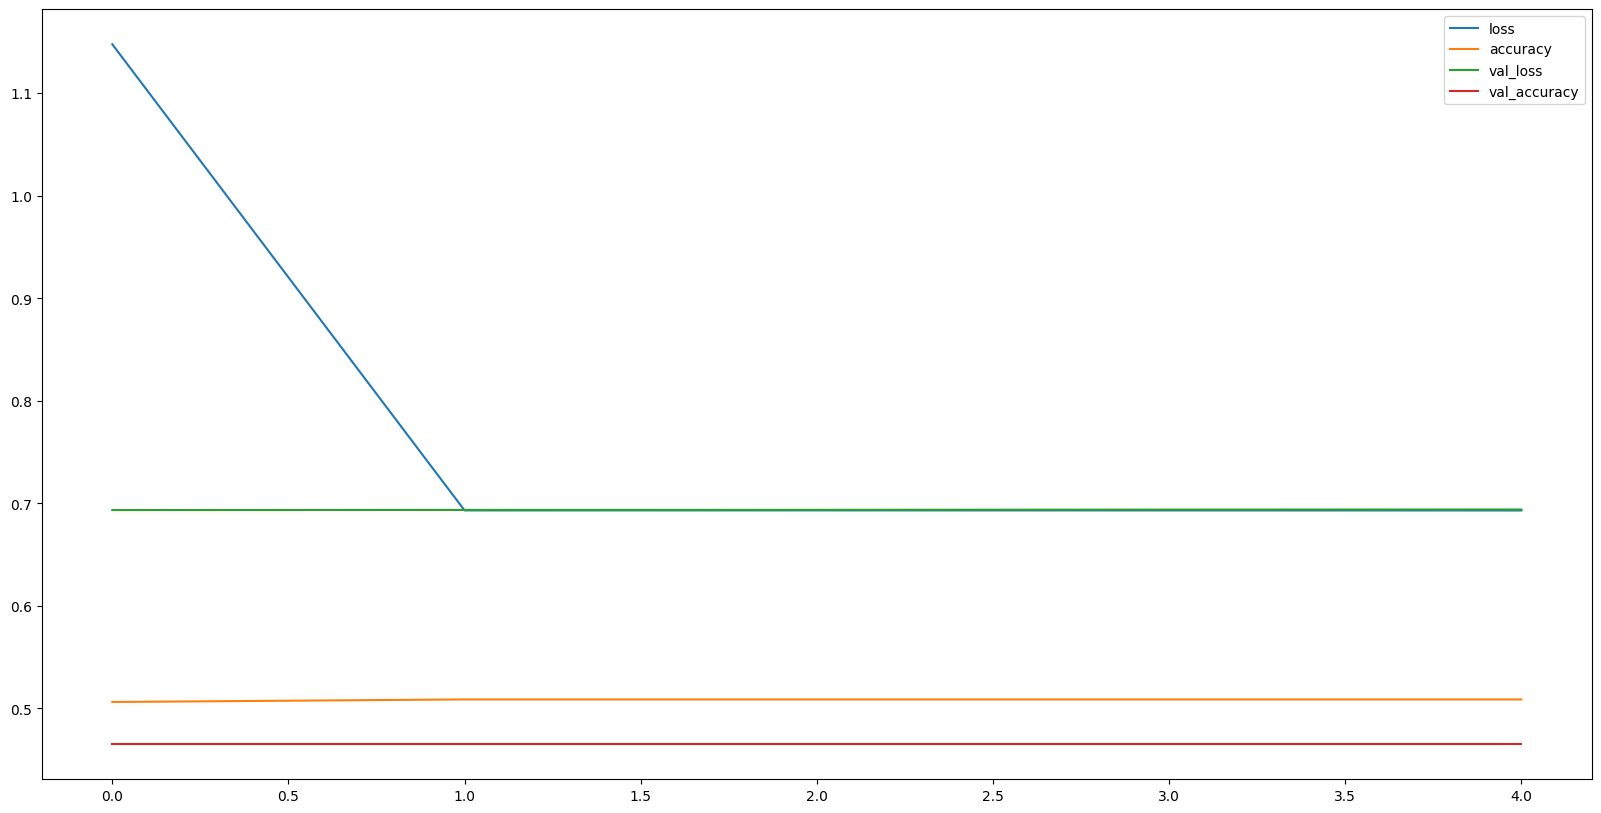

In [35]:
model_graph(history_1)

In [36]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 196608)            0         
                                                                 
 dense_26 (Dense)            (None, 4)                 786436    
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


In [37]:
tf.random.set_seed(66)

model_2 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(training_data_norm,
                        epochs=10,
                        validation_data = validation_data_norm,
                        validation_steps = len(validation_data_norm))

Epoch 1/10
50/50 [==============================] - 35s 625ms/step - loss: 3.6825 - accuracy: 0.5606 - val_loss: 0.7119 - val_accuracy: 0.6325
Epoch 2/10
50/50 [==============================] - 31s 600ms/step - loss: 0.8020 - accuracy: 0.6219 - val_loss: 0.5667 - val_accuracy: 0.7325
Epoch 3/10
50/50 [==============================] - 30s 580ms/step - loss: 0.9682 - accuracy: 0.6056 - val_loss: 0.6949 - val_accuracy: 0.6425
Epoch 4/10
50/50 [==============================] - 29s 575ms/step - loss: 0.6402 - accuracy: 0.6656 - val_loss: 0.5743 - val_accuracy: 0.7275
Epoch 5/10
50/50 [==============================] - 29s 572ms/step - loss: 0.6248 - accuracy: 0.6856 - val_loss: 0.6151 - val_accuracy: 0.6925
Epoch 6/10
50/50 [==============================] - 29s 571ms/step - loss: 0.6024 - accuracy: 0.6737 - val_loss: 0.5632 - val_accuracy: 0.7175
Epoch 7/10
50/50 [==============================] - 29s 576ms/step - loss: 0.5978 - accuracy: 0.7038 - val_loss: 0.5676 - val_accuracy: 0.7275

In [38]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 196608)            0         
                                                                 
 dense_29 (Dense)            (None, 128)               25165952  
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 25,215,617
Trainable params: 25,215,617


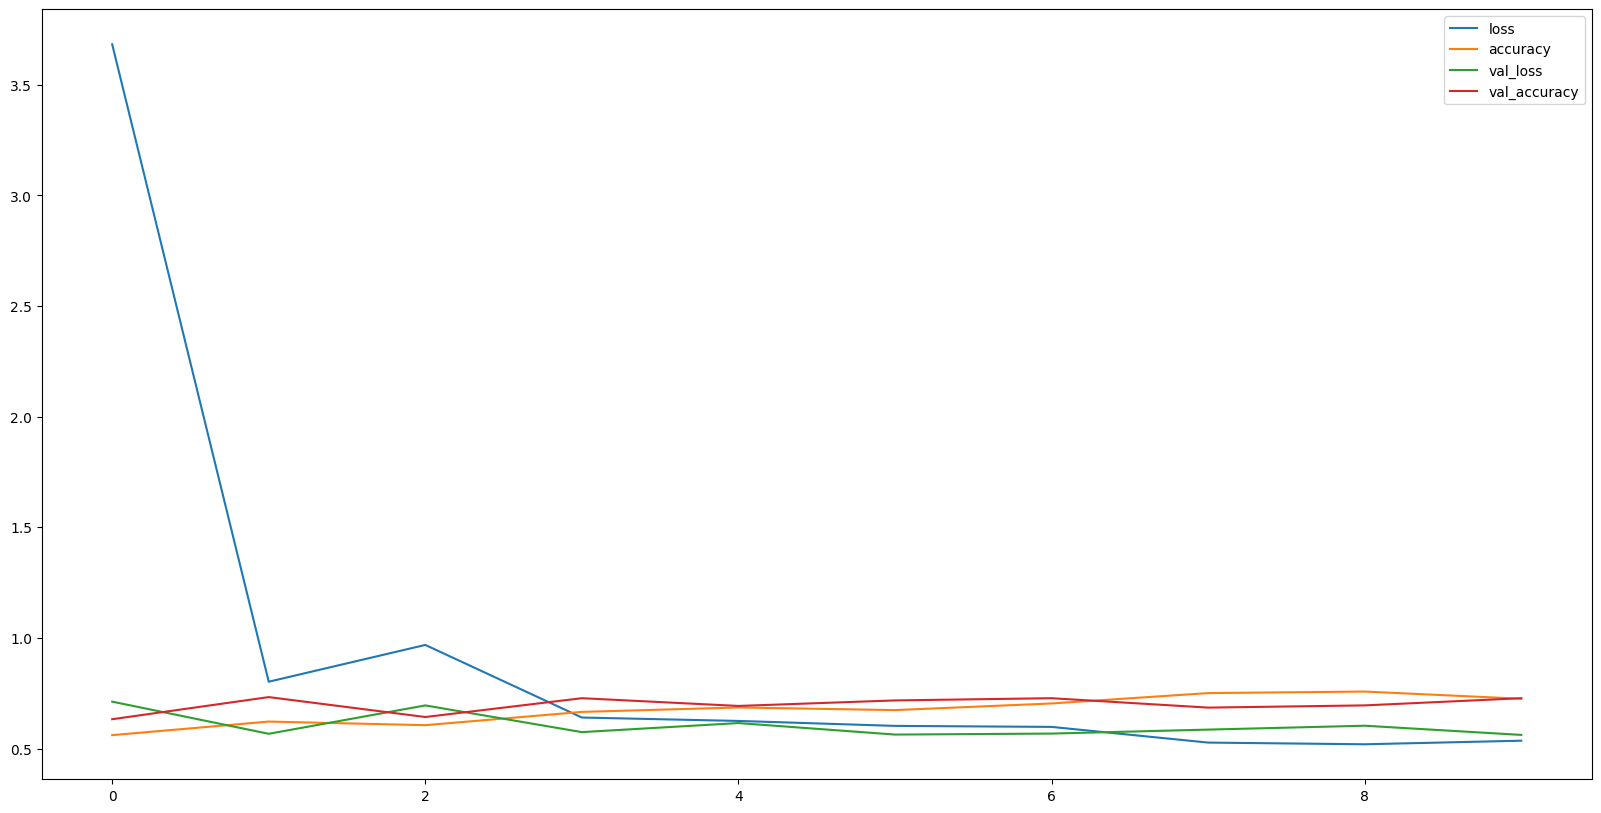

In [39]:
model_graph(history_2)

### CNN Model


In [40]:
len(training_data_norm), 1600/32

(50, 50.0)

In [45]:
model_3 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,   # can also be (3, 3)
           activation="relu",
           input_shape=(256, 256, 3)),  # first layer specifies input shape (height, width, colour channels)
    Conv2D(10, 3, activation="relu"),   # Filters, Kernel Size, activation
    Conv2D(10, 3, activation="relu"),   
    Flatten(),
    Dense(1, activation="sigmoid")      # Binary activation output layer
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(training_data_norm,
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/10


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000020A75B99F80>
Traceback (most recent call last):
  File "c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


 3/50 [>.............................] - ETA: 2:41 - loss: 4.5461 - accuracy: 0.6042

KeyboardInterrupt: 

In [46]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 252, 252, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 250, 250, 10)      910       
                                                                 
 flatten_14 (Flatten)        (None, 625000)            0         
                                                                 
 dense_37 (Dense)            (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


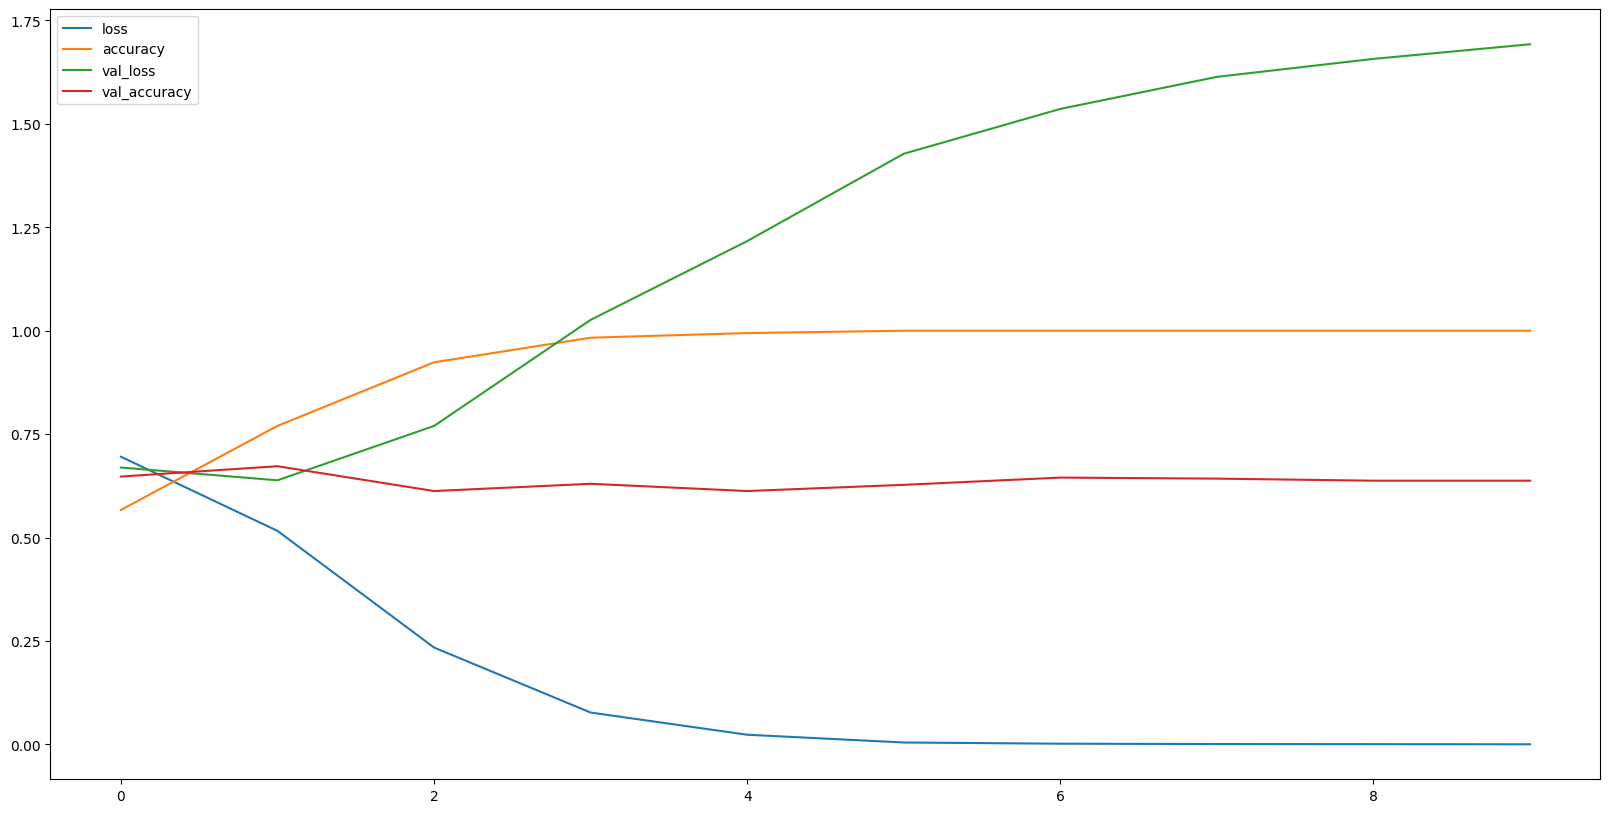

In [47]:
model_graph(history_3)

### Reduce Overfitting with Pooling

In [51]:
model_4 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,   # can also be (3, 3)
           activation="relu",
           input_shape=(256, 256, 3)),  # first layer specifies input shape (height, width, colour channels)
    MaxPool2D(pool_size = 2,            # Or (2, 2)
              padding="valid"),          # Or 'same'
    Conv2D(10, 3, activation="relu"),   # Filters, Kernel Size, activation
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),   
    Flatten(),
    Dense(1, activation="sigmoid")      # Binary activation output layer
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(training_data_norm,
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))


Epoch 1/5
50/50 [==============================] - 41s 786ms/step - loss: 0.6201 - accuracy: 0.6562 - val_loss: 0.5543 - val_accuracy: 0.7525
Epoch 2/5
50/50 [==============================] - 40s 776ms/step - loss: 0.5653 - accuracy: 0.7119 - val_loss: 0.5029 - val_accuracy: 0.7800
Epoch 3/5
50/50 [==============================] - 41s 798ms/step - loss: 0.4958 - accuracy: 0.7600 - val_loss: 0.5085 - val_accuracy: 0.7550
Epoch 4/5
50/50 [==============================] - 40s 794ms/step - loss: 0.4658 - accuracy: 0.7881 - val_loss: 0.4561 - val_accuracy: 0.8025
Epoch 5/5
50/50 [==============================] - 40s 788ms/step - loss: 0.4178 - accuracy: 0.8150 - val_loss: 0.4477 - val_accuracy: 0.8000


In [52]:
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 10)     

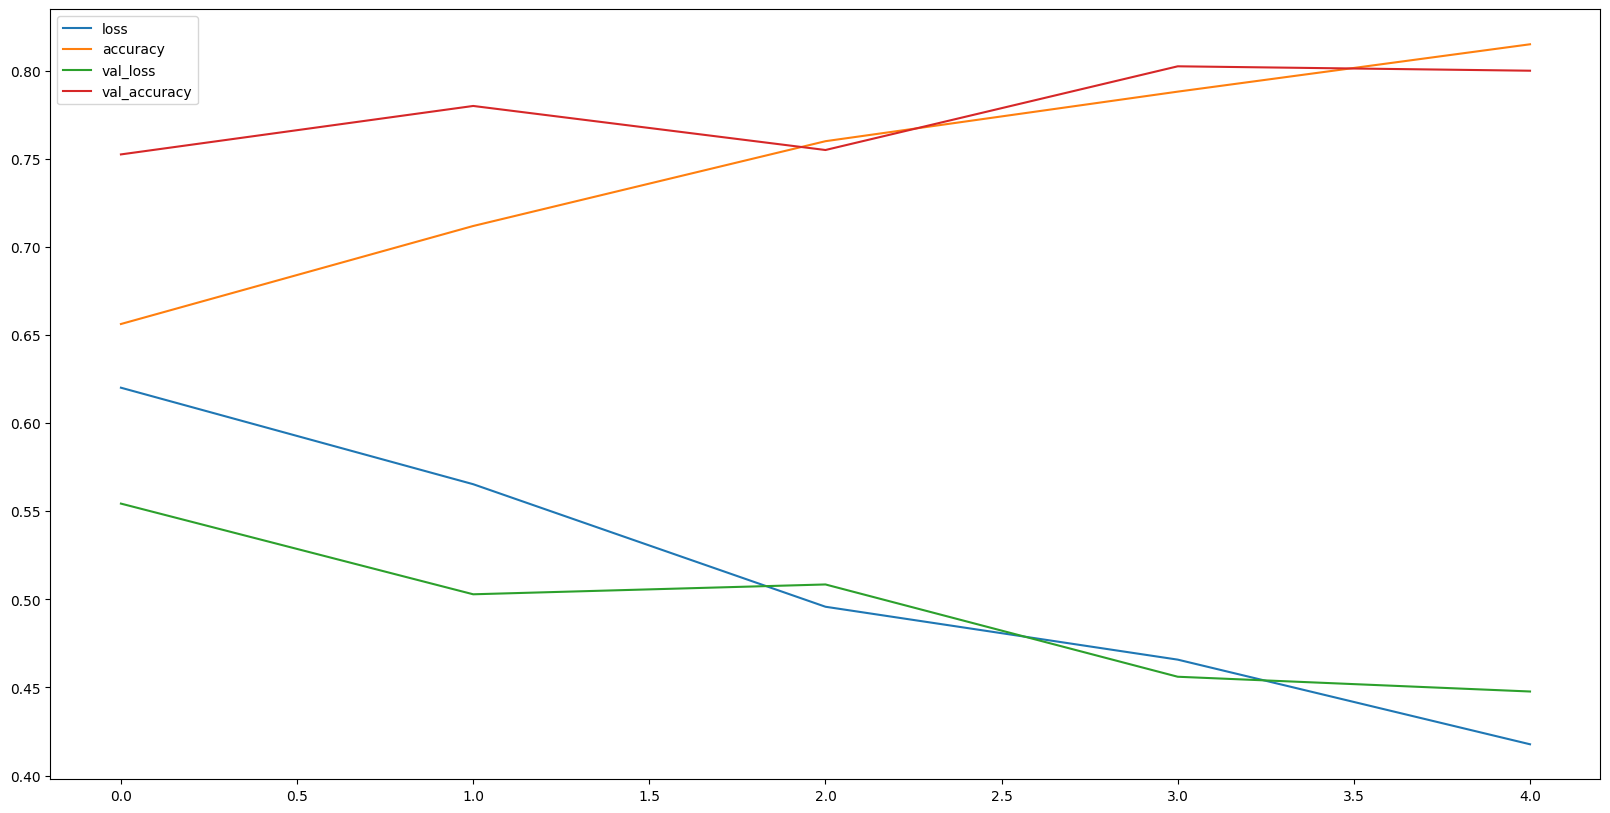

In [53]:
model_graph(history_4)

### Add More Data with Augmentation to Avoid Overfitting
Increasing the amount of data by adding slightly modified versions of existing data. Images are rotated, cropped, sheared, zoomed, flipped, etc.

In [54]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [56]:
model_5 = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,   # can also be (3, 3)
           activation="relu",
           input_shape=(256, 256, 3)),  # first layer specifies input shape (height, width, colour channels)
    MaxPool2D(pool_size = 2,            # Or (2, 2)
              padding="valid"),          # Or 'same'
    Conv2D(10, 3, activation="relu"),   # Filters, Kernel Size, activation
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),   
    Flatten(),
    Dense(1, activation="sigmoid")      # Binary activation output layer
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(training_data_norm,
                        epochs=5,
                        validation_data=validation_data_norm,
                        validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 41s 777ms/step - loss: 0.6838 - accuracy: 0.5650 - val_loss: 0.6768 - val_accuracy: 0.5450
Epoch 2/5
50/50 [==============================] - 36s 710ms/step - loss: 0.6080 - accuracy: 0.6681 - val_loss: 0.6075 - val_accuracy: 0.6550
Epoch 3/5
50/50 [==============================] - 37s 731ms/step - loss: 0.5378 - accuracy: 0.7387 - val_loss: 0.5025 - val_accuracy: 0.7700
Epoch 4/5
50/50 [==============================] - 41s 793ms/step - loss: 0.4722 - accuracy: 0.7763 - val_loss: 0.4964 - val_accuracy: 0.7675
Epoch 5/5
50/50 [==============================] - 40s 782ms/step - loss: 0.4160 - accuracy: 0.8125 - val_loss: 0.4584 - val_accuracy: 0.7725


In [57]:
model_5.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 10)     

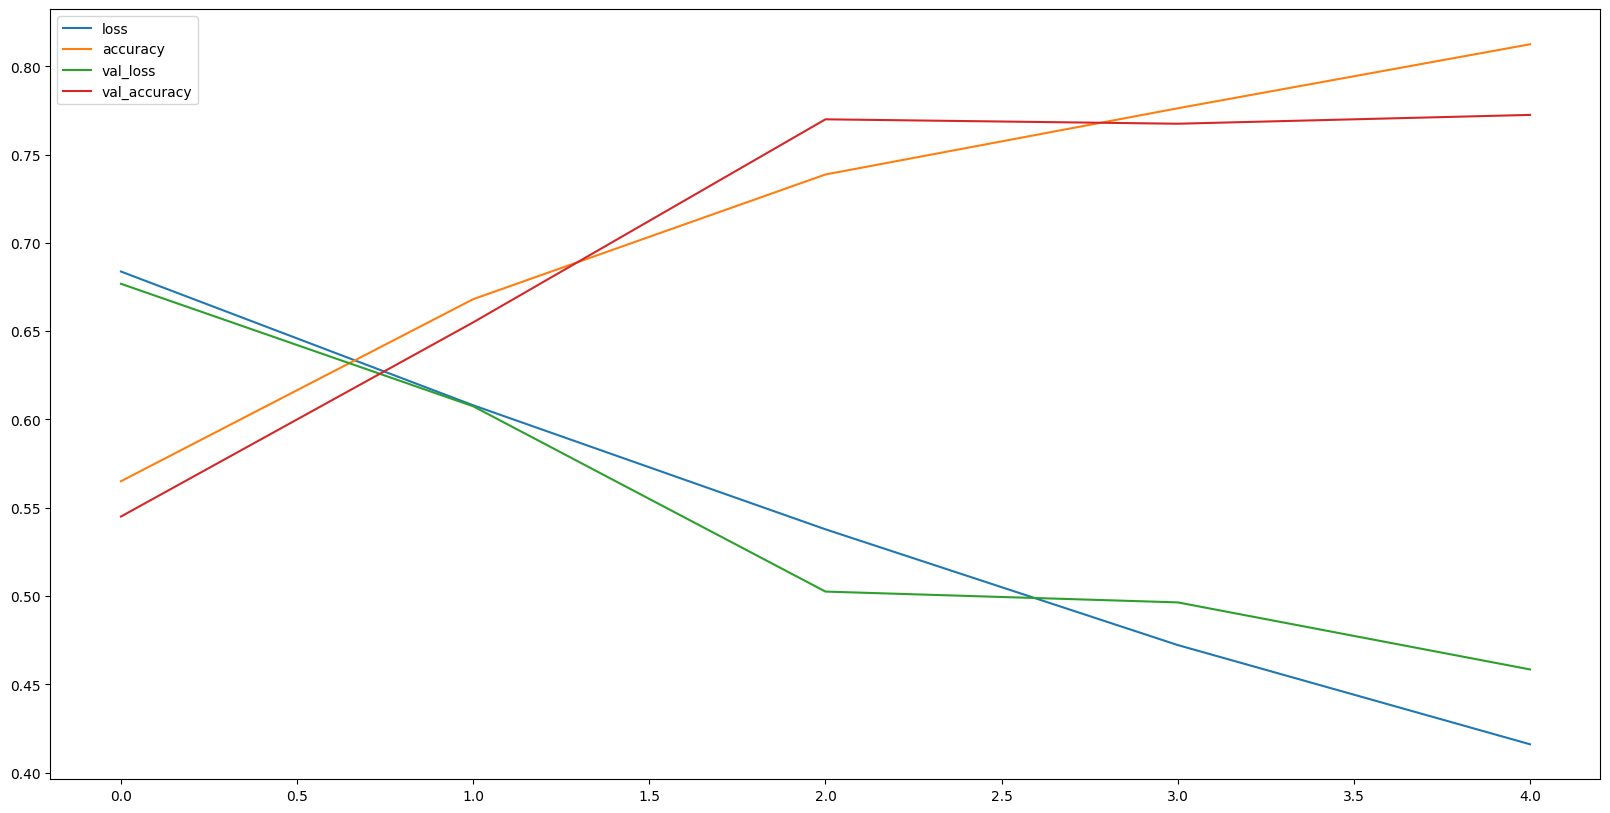

In [58]:
model_graph(history_5)

### Prediction of random image

(-0.5, 193.5, 258.5, -0.5)

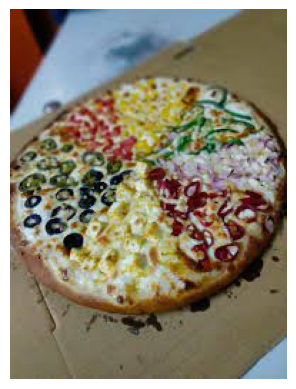

In [60]:
my_pizza = mpimg.imread("D:\python tutorial\CNN\hotdog_pizza\\test.jpeg")
plt.imshow(my_pizza)
plt.axis(False)

In [61]:
my_pizza.shape

(259, 194, 3)

In [62]:
my_pizza

array([[[116,  37,   6],
        [117,  36,   6],
        [123,  34,   4],
        ...,
        [103,  97,  61],
        [104,  95,  64],
        [104,  95,  66]],

       [[116,  37,   6],
        [119,  36,   6],
        [121,  34,   4],
        ...,
        [103,  97,  61],
        [104,  95,  64],
        [104,  95,  64]],

       [[117,  36,   6],
        [119,  36,   6],
        [121,  34,   4],
        ...,
        [104,  98,  62],
        [103,  97,  63],
        [103,  97,  63]],

       ...,

       [[128, 121,  93],
        [125, 118,  89],
        [122, 115,  87],
        ...,
        [128, 163, 191],
        [126, 161, 189],
        [126, 161, 189]],

       [[128, 121,  93],
        [125, 118,  90],
        [122, 115,  87],
        ...,
        [128, 163, 191],
        [125, 162, 189],
        [123, 163, 189]],

       [[128, 121,  93],
        [125, 118,  90],
        [122, 115,  87],
        ...,
        [127, 164, 191],
        [119, 163, 188],
        [117, 165, 188]]

In [64]:
# Normalize and Resize image data

my_pizza = tf.io.read_file("D:\python tutorial\CNN\hotdog_pizza\\test.jpeg")

my_pizza = tf.image.decode_image(my_pizza)

my_pizza = tf.image.resize(my_pizza, size=[256,256])

my_pizza = my_pizza/255

my_pizza

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.45490196, 0.14509805, 0.02352941],
        [0.4573989 , 0.14509805, 0.01853554],
        [0.46501225, 0.1404565 , 0.01568628],
        ...,
        [0.40472096, 0.37720448, 0.24159007],
        [0.4077972 , 0.372572  , 0.24598652],
        [0.4077972 , 0.372572  , 0.2509804 ]],

       [[0.45490196, 0.14509805, 0.02352941],
        [0.4573989 , 0.14509805, 0.01853554],
        [0.46501225, 0.1404565 , 0.01568628],
        ...,
        [0.39998546, 0.37963387, 0.24161728],
        [0.39993107, 0.37653953, 0.24593644],
        [0.39993107, 0.37653953, 0.2508425 ]],

       [[0.45501685, 0.14498314, 0.02352941],
        [0.45758694, 0.14498314, 0.01868184],
        [0.46515137, 0.14038694, 0.0158254 ],
        ...,
        [0.39928767, 0.3836014 , 0.2430677 ],
        [0.39619333, 0.38050705, 0.24302237],
        [0.39619333, 0.38050705, 0.24302237]],

       ...,

       [[0.49792433, 0.47058824, 0.3565181 ],
        [0.49

In [65]:
# Preidiction of data

prediction = model_5.predict(tf.expand_dims(my_pizza, axis=0))

prediction

1/1 [==============================] - 0s 270ms/step


array([[0.8333575]], dtype=float32)

In [66]:
# Predicted class Name
prediction_class = class_names[int(tf.round(prediction))]

prediction_class

'pizza'

In [67]:
# Saving the model for later use
model_5.save("Binary_CNN_Model")

INFO:tensorflow:Assets written to: Binary_CNN_Model\assets


INFO:tensorflow:Assets written to: Binary_CNN_Model\assets


In [68]:
# Loading already trained Model
saved_model = tf.keras.models.load_model("Binary_CNN_Model")
saved_model.evaluate(validation_data_norm)

13/13 [==============================] - 3s 180ms/step - loss: 0.4584 - accuracy: 0.7725


[0.4584103524684906, 0.7724999785423279]